# 线性回归的从零开始实现
# 基础概念
学习率：步长的超参数，学习率不能太低，因为太低会导致收敛太慢，同时学习率页不能太大，会导致结果一直在反复震荡，无法收敛
第二个：损失的计算，我们不是对整个数据进行损失计算，而是随机采样b个样本，来近似损失，


In [19]:
import random
import torch
from d2l import torch as d2l

In [20]:
def synthetic_data(w,b,num_examples):
    x = torch.normal(0,1,(num_examples,len(w))) # 随机生成0-1的数据，数据的个数等于Num，数据的维度等于len（w）

    y = torch.matmul(x,w)+b # 计算的结果值
    y+= torch.normal(0,0.01,y.shape)
    return x,y.reshape((-1,1))
true_w = torch.tensor([2,-3.4])
true_b = 4.2
features,labels = synthetic_data(true_w,true_b,1000)



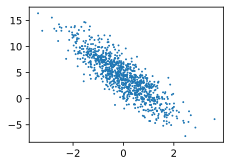

In [21]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),labels.detach().numpy(),1)

In [22]:
# 随机读取函数，实现小批量的生成对象
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples)) # 强转为list
    random.shuffle(indices)
    # range函数可以传入三个参数 start end, step 左闭右开
    for i in range(0,num_examples,batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices],labels[batch_indices] # yield 返回可迭代的对象，程序不会真的运行，而是要等next触发以后才会执行

In [23]:
# 定义批次的大小为10
batch_size = 10

# w 和b的初始化
w = torch.normal(0,0.01,size=(2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)

def linreg(X,w,b):
    """线性回归模型"""
    return torch.matmul(X,w)+b
# 定义损失函数
def square_loss(y_hat,y):
    return (y_hat-y.reshape(y_hat.shape))**2/2

# 定义优化算法
def sgd(params,lr,batch_size):
    """小批量随机梯度下降
    在该模块下，所有计算得出的tensor的requires_grad都自动设置为False。
    """
    with torch.no_grad():
        for param in params:
            # 梯度信息会存在grad里面
            param -= lr*param.grad/batch_size
            # 梯度信息删除，
            param.grad.zero_()

# 训练过程

In [24]:
lr = 1
num_epochs = 10
net = linreg
loss = square_loss
for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l = loss(net(X,w,b),y)
        l.sum().backward() # 在损失函数的地方执行backward，会直接推导在变量的梯度上进行体现
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch{epoch+1},loss {float(train_l.mean()):f}')


epoch1,loss 0.000050
epoch2,loss 0.000074
epoch3,loss 0.000048
epoch4,loss 0.000058
epoch5,loss 0.000067
epoch6,loss 0.000062
epoch7,loss 0.000062
epoch8,loss 0.000065
epoch9,loss 0.000175
epoch10,loss 0.000060
